In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
courts = pd.read_csv("list.csv")
courts.head(5)

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


In [3]:
court_count = {} 
quantity = 1

for index, row in courts.iterrows():
    item_name = row['neighborhood']
    if item_name in court_count:
        court_count[item_name] += quantity
    else:
        court_count[item_name] = quantity

print(court_count)

{'Allegheny Center': 9, 'Beechview': 7, 'Bedford Dwellings': 2, 'South Side Slopes': 6, 'South Side Flats': 5, 'Lower Lawrenceville': 6, 'Crawford-Roberts': 2, 'Banksville': 3, 'Bon Air': 1, 'Central Oakland': 1, 'Brighton Heights': 2, 'Brookline': 9, 'Hazelwood': 10, 'Lincoln-Lemington-Belmar': 2, 'Troy Hill': 8, 'Perry South': 1, 'Homewood West': 1, 'Squirrel Hill South': 26, 'Strip District': 1, 'Stanton Heights': 2, 'Crafton Heights': 3, 'Upper Lawrenceville': 2, 'East Carnegie': 2, 'East Hills': 2, 'Duquesne Heights': 2, 'Allentown': 1, 'Mount Washington': 5, 'East Liberty': 6, 'Fairywood': 2, 'Fineview': 2, 'Garfield': 3, 'Greenfield': 5, 'South Oakland': 2, 'Point Breeze': 2, 'Regent Square': 6, 'Hays': 1, 'Elliott': 5, 'Morningside': 4, 'Highland Park': 20, 'Central Northside': 2, 'Terrace Village': 5, 'Larimer': 1, 'Spring Hill-City View': 4, 'Carrick': 3, 'Central Lawrenceville': 1, 'Manchester': 6, 'Marshall-Shadeland': 1, 'Lincoln Place': 4, 'Sheraden': 6, 'Beltzhoover': 9,

In [4]:
# Convert the dictionary to a DataFrame
court_counts_df = pd.DataFrame(list(court_count.items()), columns=['neighborhood', 'Court_Count'])

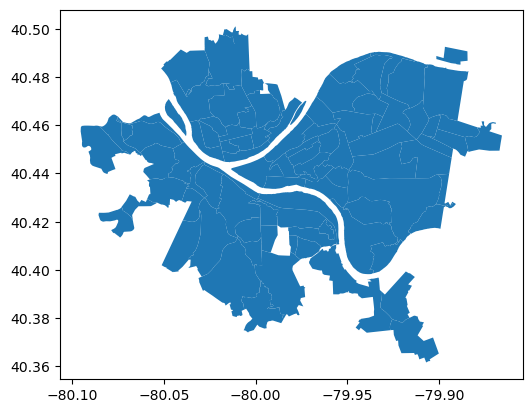

In [5]:
# Load the neighborhoods shapefile
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot() # plot the geopandas dataframe
plt.show()

In [6]:
# Merge the court counts DataFrame with the neighborhood shapefile data
courts_map = neighborhoods.merge(court_counts_df, how='left', left_on='hood', right_on='neighborhood')

In [7]:
courts_map[['hood','Court_Count','geometry']].head()

,hood,Court_Count,geometry
0,Central Oakland,1.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


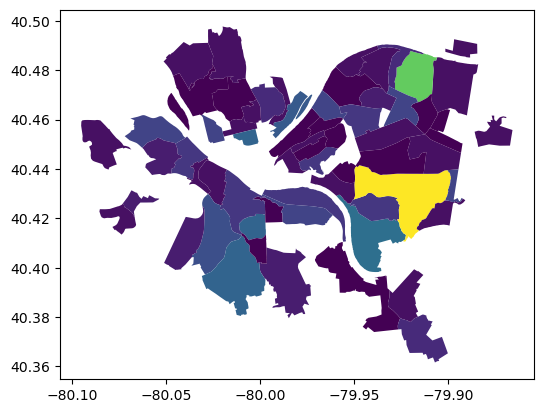

In [8]:
courts_map.plot(column='Court_Count')
plt.show()

<Axes: >

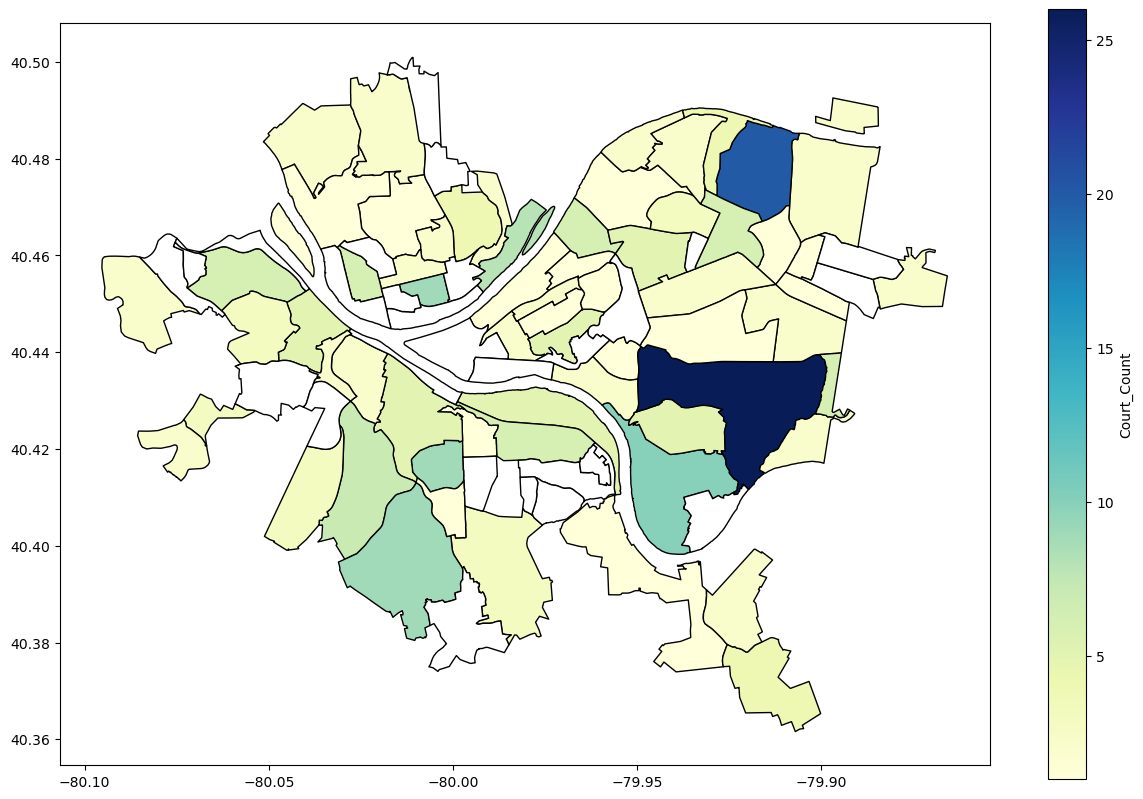

In [9]:
courts_map.plot(column='Court_Count', # set the data to be used for coloring
               cmap='YlGnBu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Court_Count"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "white"} # set disctricts with no data to gray
               )